In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# AIBE Project: **Diabetes Prediction Algorithm**



**by Stacey Fiona Torres, NUIB: 21406464**

*(Using the Diabetes Dataset from [Kaggle.com](https://www.kaggle.com/datasets/mathchi/diabetes-data-set))*

## 1) About the Database and Project

***Objective:*** to implement Support Vector Machine Algorithm and Validate its ability to predict whether a patient has diabetes or not from the following features:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)

Label:
- **Outcome**: Class variable (0 or 1)
    
    0 means the subject has no diabetes and a label 1 means the subject has diabetes.


---

**More relevant information about the Database:**
  
  The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases.

  Several constraints were placed on the selection of these instances from
a larger database.  

  In particular, all patients here are females atleast 21 years old of Pima Indian heritage.  ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices.  
  
  It is a unique algorithm; see the paper for details.

## 2) Loading CSV File + Imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Load the diabetes dataframe

In [ ]:
diab_df = pd.read_csv("/content/drive/MyDrive/4/AIBE/Diabetes/Final2/diabetes.csv")

## 3) Characterising the Diabetes Dataframe

In [ ]:
diab_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diab_df.shape

(768, 9)

In [ ]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diab_df.dtypes

# All numerical data, good.

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
print(diab_df.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [ ]:
# Rename DiabetesPedigreeFunction to DPF
diab_df.rename(columns={'DiabetesPedigreeFunction': 'DPF', 'BloodPressure': 'BP', 'SkinThickness':'S.T'}, inplace=True)
print(diab_df.columns.values)

['Pregnancies' 'Glucose' 'BP' 'S.T' 'Insulin' 'BMI' 'DPF' 'Age' 'Outcome']


In [ ]:
diab_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Using the ff code, there are 500 subjects with no diabetes, and the remaining 268 of 768 patients have Diabetes.

In [ ]:
diab_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

65% do not have diabetes and about 35% of the subjects do:

In [ ]:
diab_df['Outcome'].value_counts()*100/len(diab_df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

Graph nicely for powerpoint:

In [ ]:
import plotly.graph_objects as go

colors = ['silver', 'cyan']
labels = ['No Diabetes','Diabetes']
values = diab_df['Outcome'].value_counts()/diab_df['Outcome'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text="Outcome")
fig.show()

Age distribution

<Axes: >

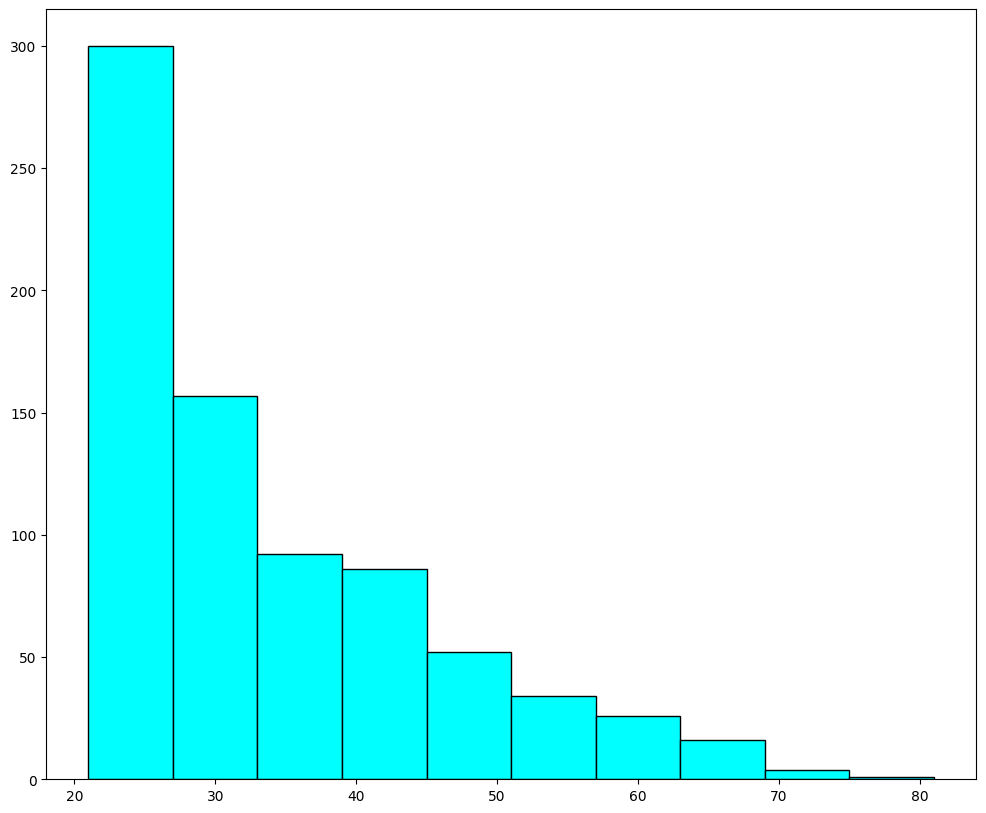

In [ ]:
diab_df['Age'].hist(edgecolor='k', grid=False, figsize=(12,10), facecolor='cyan')

Try a very simple plot:
1. Extract information from those with and without diabetes
2. Use .plot method
3. Use *ax* parameter to superimpose plots

In [ ]:
# # 1.
# hasDiab_df = diab_df[diab_df['Outcome'] == 1][0:250] # first 250 rows
# # similarly,
# noDiab_df = diab_df[diab_df['Outcome'] == 0][0:250]

# # 2. and 3. (plot insulin against glucose levels)
# superimp = hasDiab_df.plot(kind='scatter', x='Glucose', y='Insulin', color='red', label='Has Diabetes')
# noDiab_df.plot(title='Insulin vs Glucose levels', ax=superimp, kind='scatter', x='Glucose', y='Insulin', color='blue', label='Has No Diabetes' )

# # really helpful to use
#   # help(noDiab_df.plot)

## 4) Pre-Processing and Feature Engineering


### Checking for NaN Values

<Axes: >

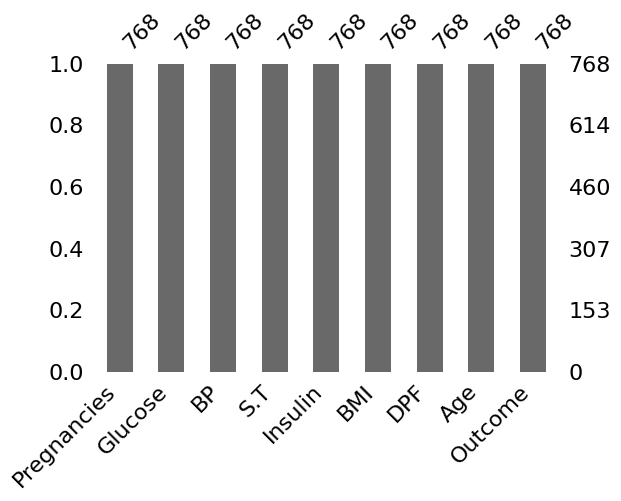

In [ ]:
import missingno as msno
msno.bar(diab_df, figsize=(6,4))

There are no missing values.

### Feature Classification Algorithms

**K-Best Classifier**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X_KBest = diab_df.iloc[:, 0:8]
y_KBest = diab_df.iloc[:, -1] # Target column is Outcome

# Apply SelectKBest to extract top 5 features
features_KBest = SelectKBest(score_func=chi2, k = 8)
fit_KBest = features_KBest.fit(X_KBest, y_KBest)

dfscores_KBest = pd.DataFrame(fit_KBest.scores_)
dfcolumns_KBest = pd.DataFrame(X_KBest.columns)

# concatenate two dataframes
featureScores_KBest = pd.concat([dfcolumns_KBest, dfscores_KBest], axis = 1)
featureScores_KBest.columns = ["Attributes", "Score"] # Naming the Dataframe columns

print(featureScores_KBest.nlargest(8, "Score"))

    Attributes        Score
4      Insulin  2175.565273
1      Glucose  1411.887041
7          Age   181.303689
5          BMI   127.669343
0  Pregnancies   111.519691
3          S.T    53.108040
2           BP    17.605373
6          DPF     5.392682


The scores for DiabetesPedigreeFunction and BloodPressure are very low, while Top 5 are Insulin, Glucose, Age, BMI and No. of Pregnancies

**Heatmap: Simple Correlation**

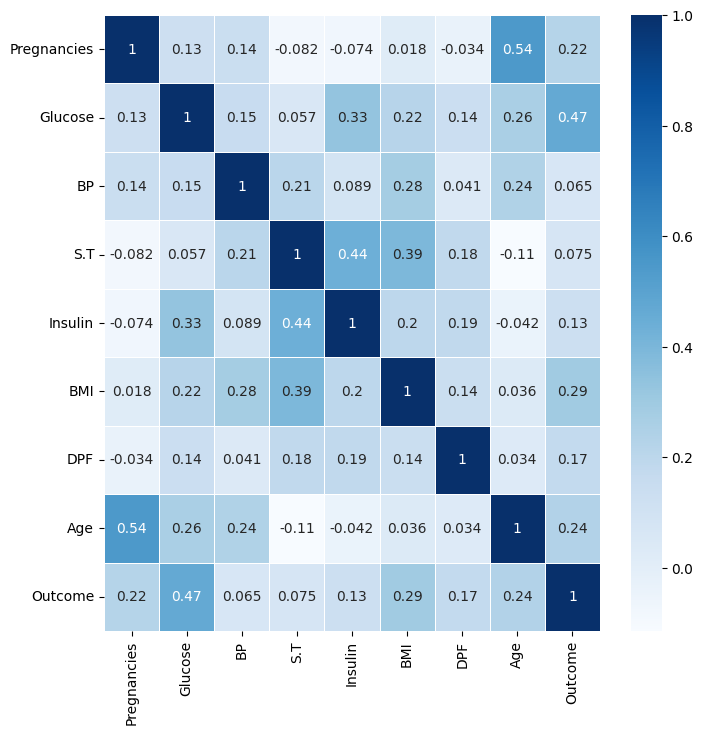

             Pregnancies   Glucose        BP       S.T   Insulin       BMI  \
Pregnancies     1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683   
Glucose         0.129459  1.000000  0.152590  0.057328  0.331357  0.221071   
BP              0.141282  0.152590  1.000000  0.207371  0.088933  0.281805   
S.T            -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573   
Insulin        -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859   
BMI             0.017683  0.221071  0.281805  0.392573  0.197859  1.000000   
DPF            -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647   
Age             0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242   
Outcome         0.221898  0.466581  0.065068  0.074752  0.130548  0.292695   

                  DPF       Age   Outcome  
Pregnancies -0.033523  0.544341  0.221898  
Glucose      0.137337  0.263514  0.466581  
BP           0.041265  0.239528  0.065068  
S.T          0.183928 -0.113970  0.074752  

In [ ]:
import seaborn as sns

diab_corr = diab_df.corr()
fig, ax = plt.subplots(figsize=(8,8)) # depending on screensize, may need to be changed
sns.heatmap(diab_corr, annot = True, linewidths=0.5, ax=ax, square=False, xticklabels='auto', cmap='Blues')
plt.show()

print(diab_corr)

BP scored low.

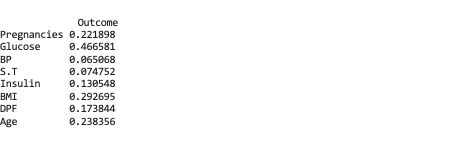

### Feature Engineering

Based on the two feature classification algorithms above, it may be best to drop either the Diabetes Pedigree Function of Blood Pressure.

In [ ]:
# This version of the code doesn't though.

# diab_df.drop('DPF', axis=1, inplace=True)
# diab_df.drop('BP', axis=1, inplace=True)

Check the shape now

In [ ]:
diab_df.head()

,Pregnancies,Glucose,BP,S.T,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diab_df.shape

(768, 9)

### Normalisation

In [ ]:
diab_df.describe()

,Pregnancies,Glucose,BP,S.T,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Defining the Features**

In [ ]:
diab_df.columns

Index(['Pregnancies', 'Glucose', 'BP', 'S.T', 'Insulin', 'BMI', 'DPF', 'Age',
       'Outcome'],
      dtype='object')

Create a dataframe without Outcome:

In [ ]:
feature_df = diab_df[['Pregnancies', 'Glucose', 'BP', 'S.T', 'Insulin', 'BMI', 'DPF', 'Age']]

**Create X and y**

In [ ]:
X = np.asarray(feature_df)
y = np.asarray(diab_df['Outcome'])

Check distribution to see if scaling is needed:

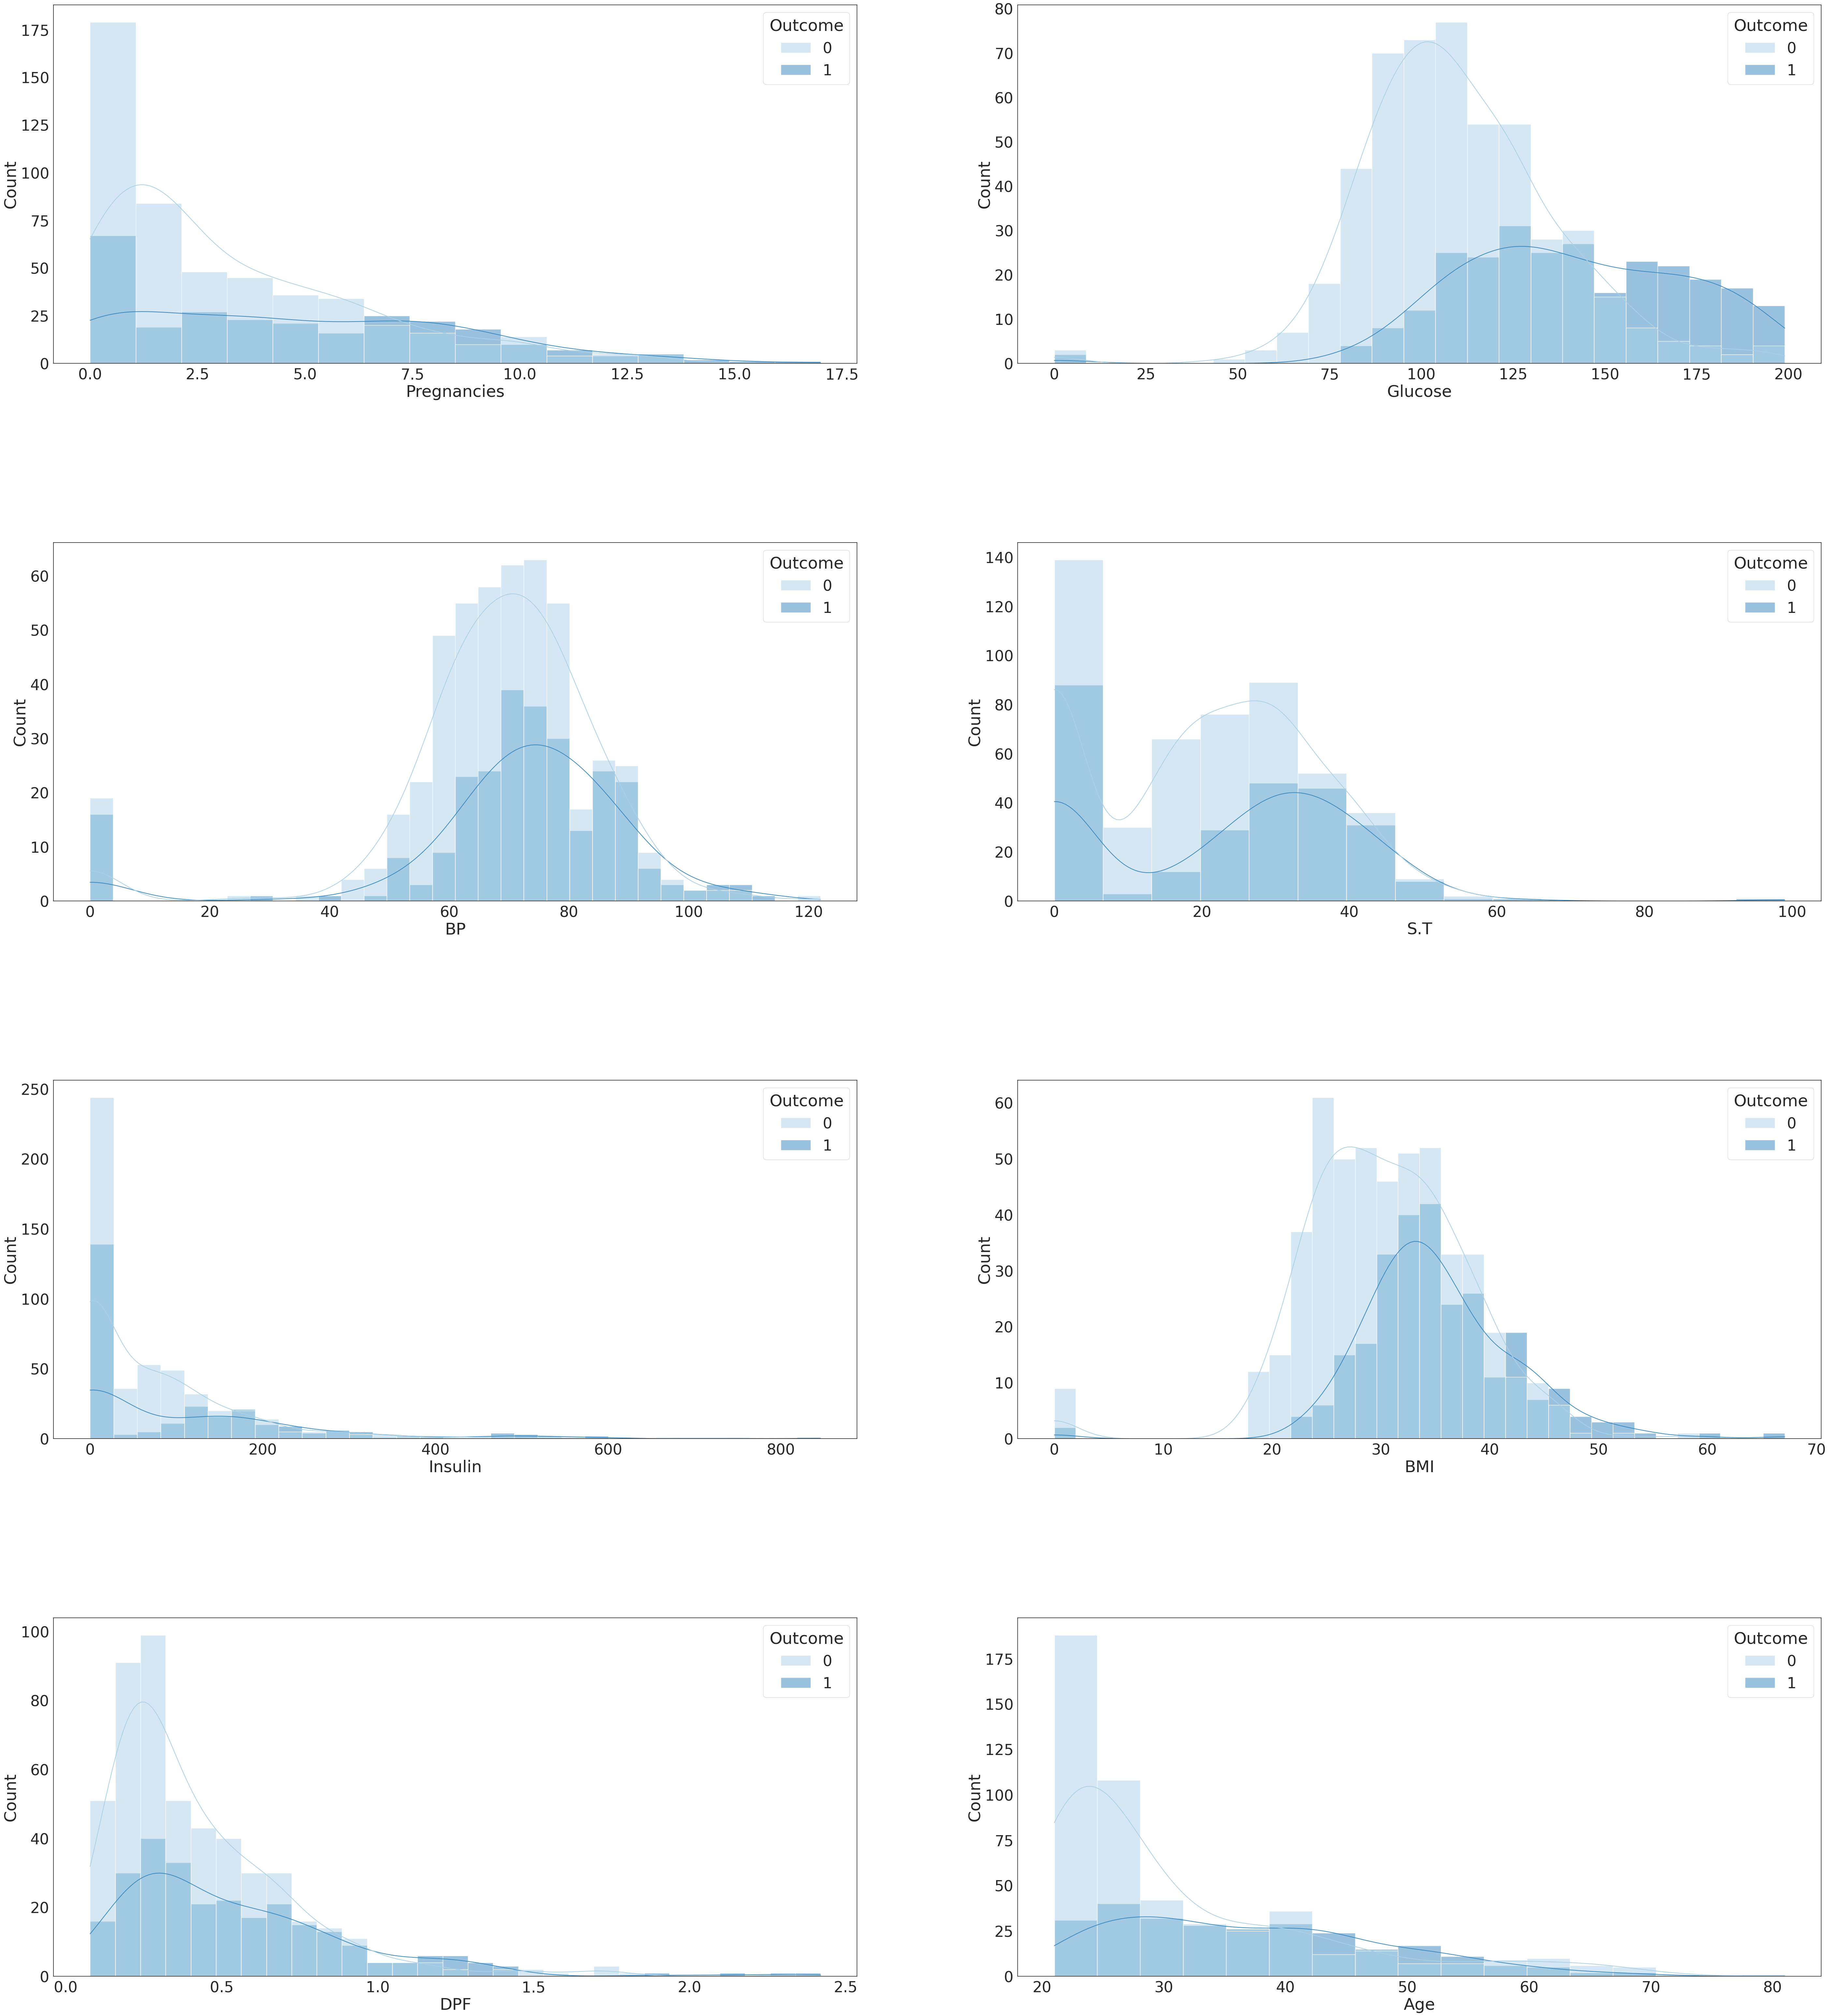

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 70,100
sns.set(font_scale = 3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace = 0.5)
i = 1

for feat in feature_df:
  plt.subplot(5, 2, i)
  # sns.histplot(data=diab_df, x = feat, hue='Outcome', kde=True, palette='YlGn')
  sns.histplot(data=diab_df, x = feat, hue='Outcome', kde=True, palette='Blues')
  i+=1

The following features may need scaling (due to their zero-valued features)
Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI.


In [ ]:
features_w_zeros = ['Pregnancies', 'Glucose', 'BP', 'S.T', 'Insulin', 'BMI']

diab_mean = diab_df[features_w_zeros].mean()
diab_df[features_w_zeros] = diab_df[features_w_zeros].replace(0, diab_mean)

Use non-linear scaling through *QuantileTransformer*

In [ ]:
from sklearn.preprocessing import QuantileTransformer

X_features = diab_df.iloc[:, :-1]

# normal distribution and default for other arguments
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X_features)

Plot distributions again to visualise differences

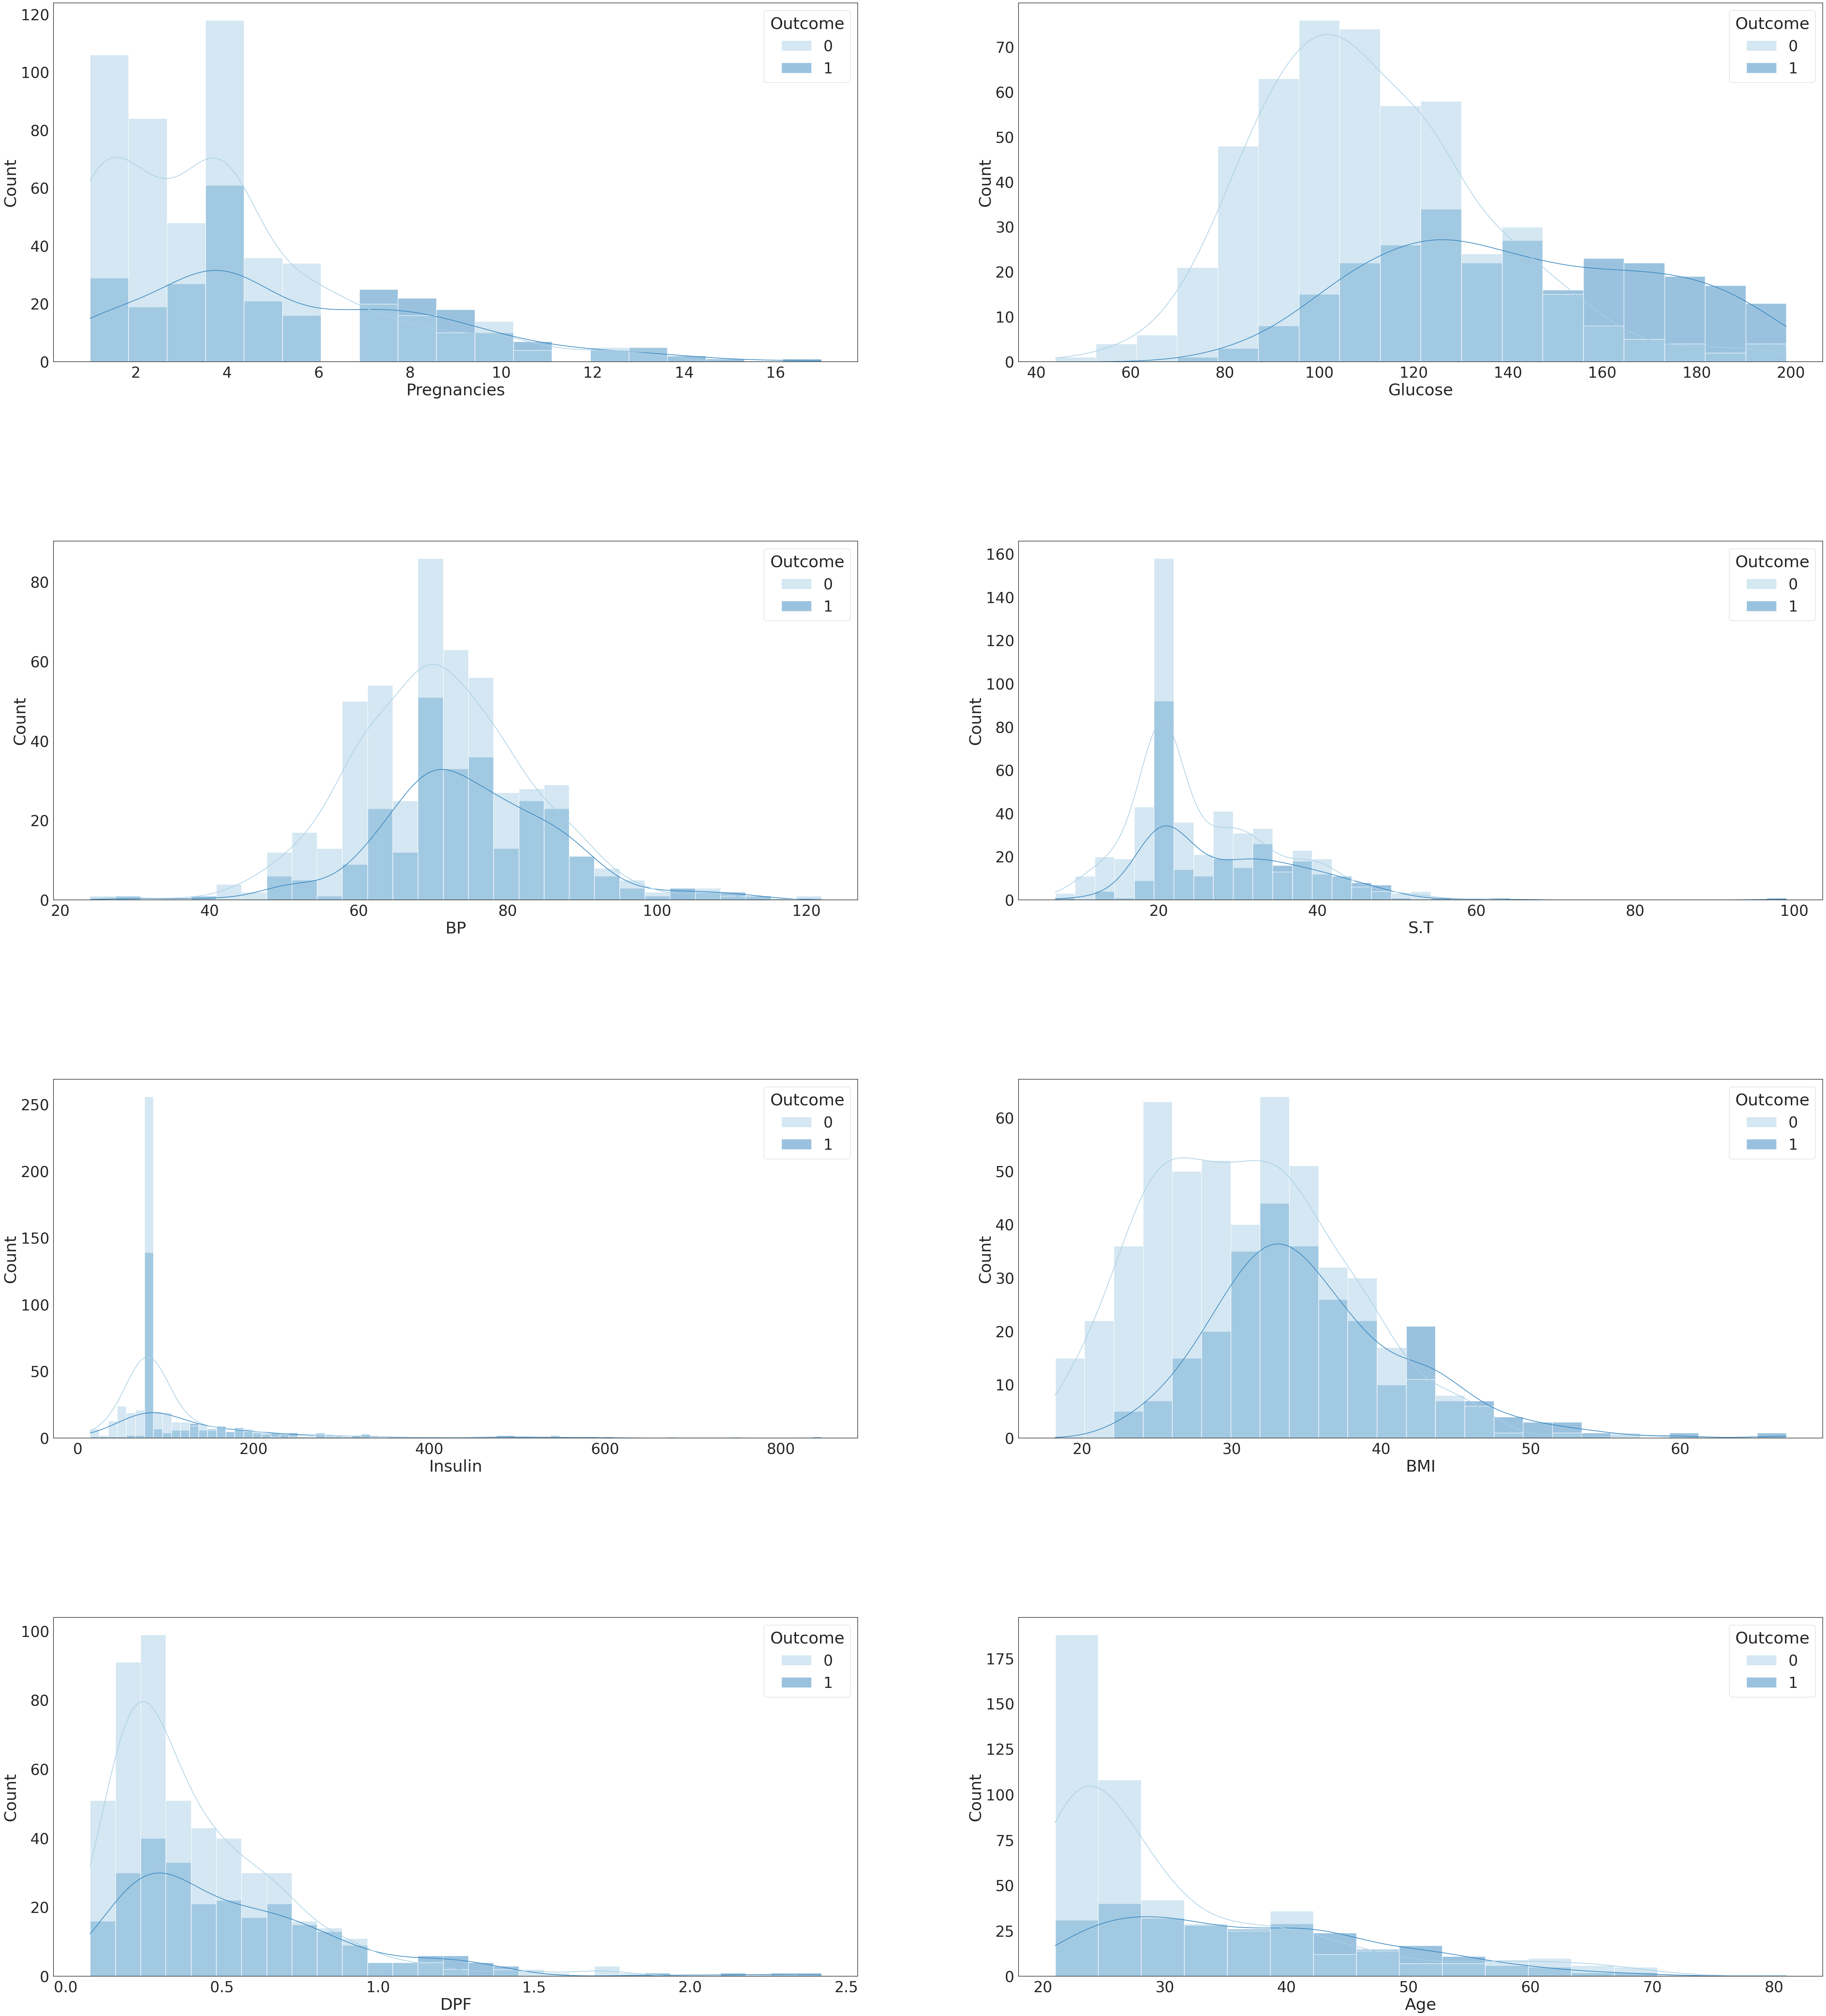

In [ ]:
rcParams['figure.figsize'] = 70,100
sns.set(font_scale = 3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace = 0.5)
i = 1

for feat in feature_df:
  plt.subplot(5, 2, i)
  # sns.histplot(data=diab_df, x = feat, hue='Outcome', kde=True, palette='YlGn')
  sns.histplot(data=diab_df, x = feat, hue='Outcome', kde=True, palette='Blues')
  i+=1

## 5) Algorithm Selection

**First divide diabetes dataframe as Train/Test dataset**

In [ ]:
from sklearn.model_selection import train_test_split

Use 1/3 for test data and 2/3 for train

In [ ]:
# Using common random_state value
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=42, shuffle=True, stratify=None)

# Checking split

### TRAINING ###
X_train.shape
y_train.shape

### TESTING ###
X_test.shape
y_test.shape

# all correct

(254,)

### Random Forest Classifier

***Random Forest Algorithm***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [ ]:
num_iterations = 50

rf_best_accuracy = 0.0
rf_best_cm = None
rf_best_auc = 0.0

for _ in range(num_iterations):
    rf_clf = RandomForestClassifier()

    # Fit and predict
    rf_clf.fit(X_train, y_train)
    rf_y_pred = rf_clf.predict(X_test)
    rf_y_prob = rf_clf.predict_proba(X_test)[:, 1]

    # Define scoring system
    rf_accuracy = accuracy_score(y_test, rf_y_pred)
    rf_confusion_mat = confusion_matrix(y_test, rf_y_pred)
    rf_auc = roc_auc_score(y_test, rf_y_prob)

    # Obtaining best set of scores
    if rf_accuracy > rf_best_accuracy:
        rf_best_accuracy = rf_accuracy
        rf_best_y_pred = rf_y_pred
        rf_best_cm = rf_confusion_mat
        rf_best_auc = rf_auc

In [ ]:
print('The best RF confusion matrix:')
print(rf_best_cm)

The best RF confusion matrix:
[[138  30]
 [ 28  58]]


Print out best accuracy score:

In [ ]:
print("Best Accuracy: {:.2f}%".format(rf_best_accuracy * 100))

Best Accuracy: 77.17%


### RF Model Validation

RF Classification Report of Best score:

In [ ]:
# Print the classification report for the best score
print("Classification Report for Best RF score:")
print()
print(classification_report(y_test, rf_best_y_pred))

Classification Report for Best RF score:

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       168
           1       0.66      0.67      0.67        86

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



RF Confusion Matrix

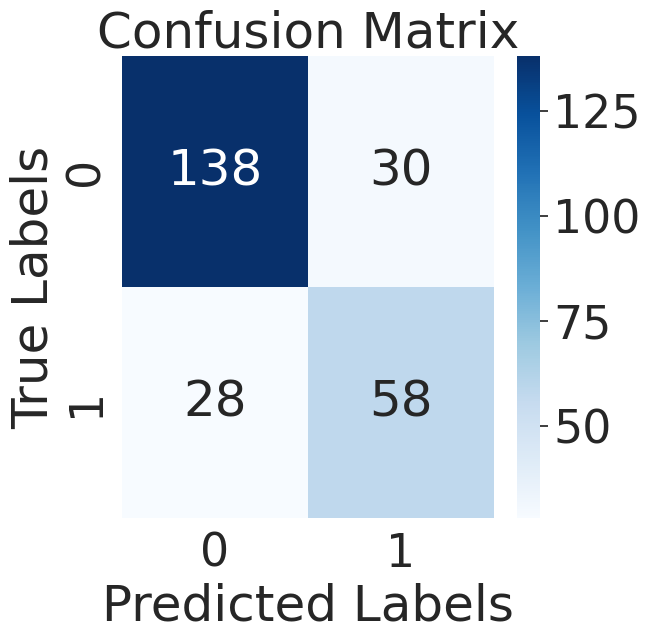

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(rf_best_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

RF ROC and AUC Score

In [ ]:
print('AUC score:', rf_best_auc.round(4))

AUC score: 0.8193


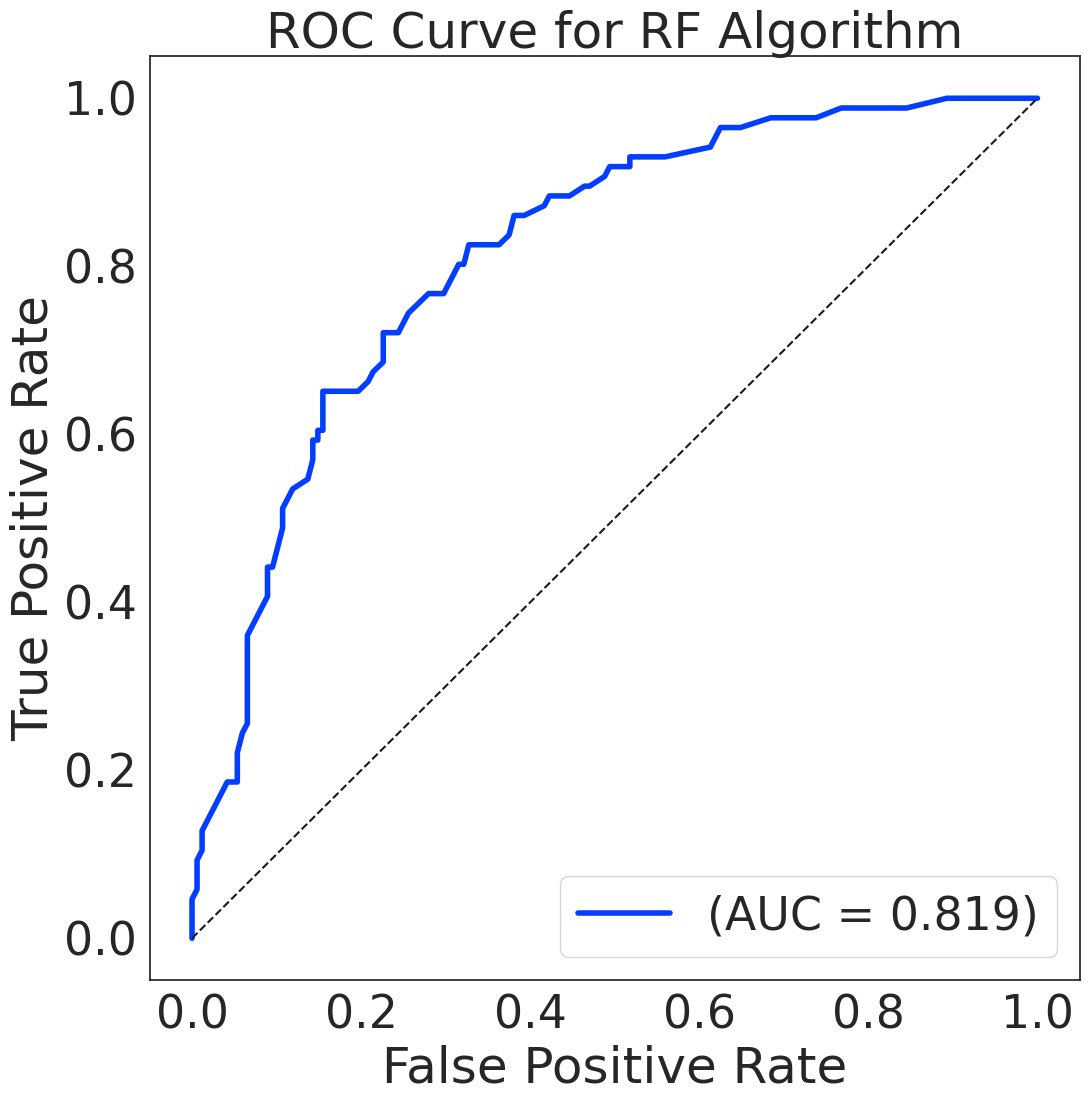

In [ ]:
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, rf_y_prob)

# Plot the ROC curve
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr, linewidth=4, label='(AUC = {:.3f})'.format(rf_best_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF Algorithm')
plt.legend(loc='lower right')
plt.show()

### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Parameter grid for search
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
              'kernel': ['rbf']}

**SVM + Nested Loop CV Algorithm; same X_train and y_train split**

In [ ]:
num_trials = 10 # originally 50 but takes 2x/3x the time it would for next SVM algo

nested_scores = [0] * num_trials
non_nested_scores = [0] * num_trials
best_parameters_non = []
best_parameters_nested = []

for i in range(num_trials):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf = GridSearchCV(SVC(), param_grid, cv=outer_cv)
    clf.fit(X_train, y_train)

    # Non nested scores
    non_nested_score = clf.best_score_
    non_nested_scores[i] = non_nested_score
    best_parameters_non.append(tuple(clf.best_params_.items()))

    clf = GridSearchCV(SVC(), param_grid, cv=inner_cv)
    clf.fit(X_train, y_train)

    # Nested scores
    nested_score = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    best_parameters_nested.append(tuple(clf.best_params_.items()))

# Finding the most common set of parameters
most_common_params_non = Counter(best_parameters_non).most_common(1)
most_common_params_nested = Counter(best_parameters_nested).most_common(1)

if most_common_params_non:
    most_common_params_non = dict(most_common_params_non[0][0])
else:
    most_common_params_non = "No common parameters found"

if most_common_params_nested:
    most_common_params_nested = dict(most_common_params_nested[0][0])
else:
    most_common_params_nested = "No common parameters found"

print("Most common set of parameters (Non nested):", most_common_params_non)
print("Most common set of parameters (Nested):", most_common_params_nested)

Most common set of parameters (Non nested): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Most common set of parameters (Nested): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


Print Accuracy scores

In [ ]:
# Get the index of the highest accuracy score
best_non_nested_index = non_nested_scores.index(max(non_nested_scores))
best_nested_index = nested_scores.index(max(nested_scores))

# Get the best parameters for the highest accuracy scores
best_non_nested_params = dict(best_parameters_non[best_non_nested_index])
best_nested_params = dict(best_parameters_nested[best_nested_index])

# Print highest accuracy scores
print("Highest accuracy score (Non nested):", max(non_nested_scores), 'with parameters:', best_non_nested_params)
print("Highest accuracy score (Nested):", max(nested_scores), 'with parameters:', best_nested_params)

Highest accuracy score (Non nested): 0.7743005087209303 with parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Highest accuracy score (Nested): 0.7704396802325582 with parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


*To further improve the efficiency and accuracy of SVM algorithm, let's try **splitting the X_train and y_train further** for separate non-nested and nested fitting:*



```
for i in range(num_trials):
    X_train_non, X_train_nested, y_train_non, y_train_nested = train_test_split(X_train, y_train, test_size=0.33, random_state=i, shuffle=True)
```



**SVM + Nested Loop CV; further split of X_train and y_train for Non-nested and Nested fitting**

In [ ]:
num_trials = 50

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
              'kernel': ['rbf']}

nested_scores2 = [0] * num_trials
non_nested_scores2 = [0] * num_trials
best_parameters_non2 = []
best_parameters_nested2 = []

for i in range(num_trials):
    # Split the X_train and y_train further
    X_train_non_nested, X_train_nested, y_train_non_nested, y_train_nested = train_test_split(X_train, y_train, test_size=0.33, random_state=i, shuffle=True, stratify=None)

    # Same algorithm applied
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_non_nested2 = GridSearchCV(SVC(), param_grid, cv=outer_cv)
    clf_non_nested2.fit(X_train_non_nested, y_train_non_nested)
    best_parameters_non2.append(tuple(clf_non_nested2.best_params_.items()))

    non_nested_score2 = clf_non_nested2.best_score_
    non_nested_scores2[i] = non_nested_score2

    clf_nested2 = GridSearchCV(SVC(), param_grid, cv=inner_cv)
    clf_nested2.fit(X_train_nested, y_train_nested)
    best_parameters_nested2.append(tuple(clf_nested2.best_params_.items()))

    nested_score2 = cross_val_score(clf_nested2, X=X_train_nested, y=y_train_nested, cv=outer_cv)
    nested_scores2[i] = nested_score2.mean()

    non_nested_y_pred2 = clf_non_nested2.predict(X_test)
    nested_y_pred2 = clf_nested2.predict(X_test)

# Now find new best set of parameters for each
most_common_params_non2 = Counter(best_parameters_non2).most_common(1)
most_common_params_nested2 = Counter(best_parameters_nested2).most_common(1)

if most_common_params_non2:
    most_common_params_non2 = dict(most_common_params_non2[0][0])
else:
    most_common_params_non2 = "No common parameters found"

if most_common_params_nested2:
    most_common_params_nested2 = dict(most_common_params_nested2[0][0])
else:
    most_common_params_nested2 = "No common parameters found"

print("Most common set of parameters (Non nested):", most_common_params_non2)
print("Most common set of parameters (Nested):", most_common_params_nested2)


Most common set of parameters (Non nested): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Most common set of parameters (Nested): {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# Get the index of the highest accuracy score
best_non_nested_index2 = non_nested_scores2.index(max(non_nested_scores2))
best_nested_index2 = nested_scores2.index(max(nested_scores2))

# Get the best parameters for the highest accuracy scores
best_non_nested_params2 = dict(best_parameters_non2[best_non_nested_index2])
best_nested_params2 = dict(best_parameters_nested2[best_nested_index2])

# Print highest accuracy scores
print("Highest score for Non nested model:", max(non_nested_scores2), 'with parameters:', best_non_nested_params2)
print("Highest score for Nested model:", max(nested_scores2), 'with parameters:', best_nested_params2)

Highest score for Non nested model: 0.7965116279069767 with parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Highest score for Nested model: 0.823920265780731 with parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Performs way better than previous one and can even handle more iterations within the same time!

---


Plot performance of Nested vs Non nested loop CV:

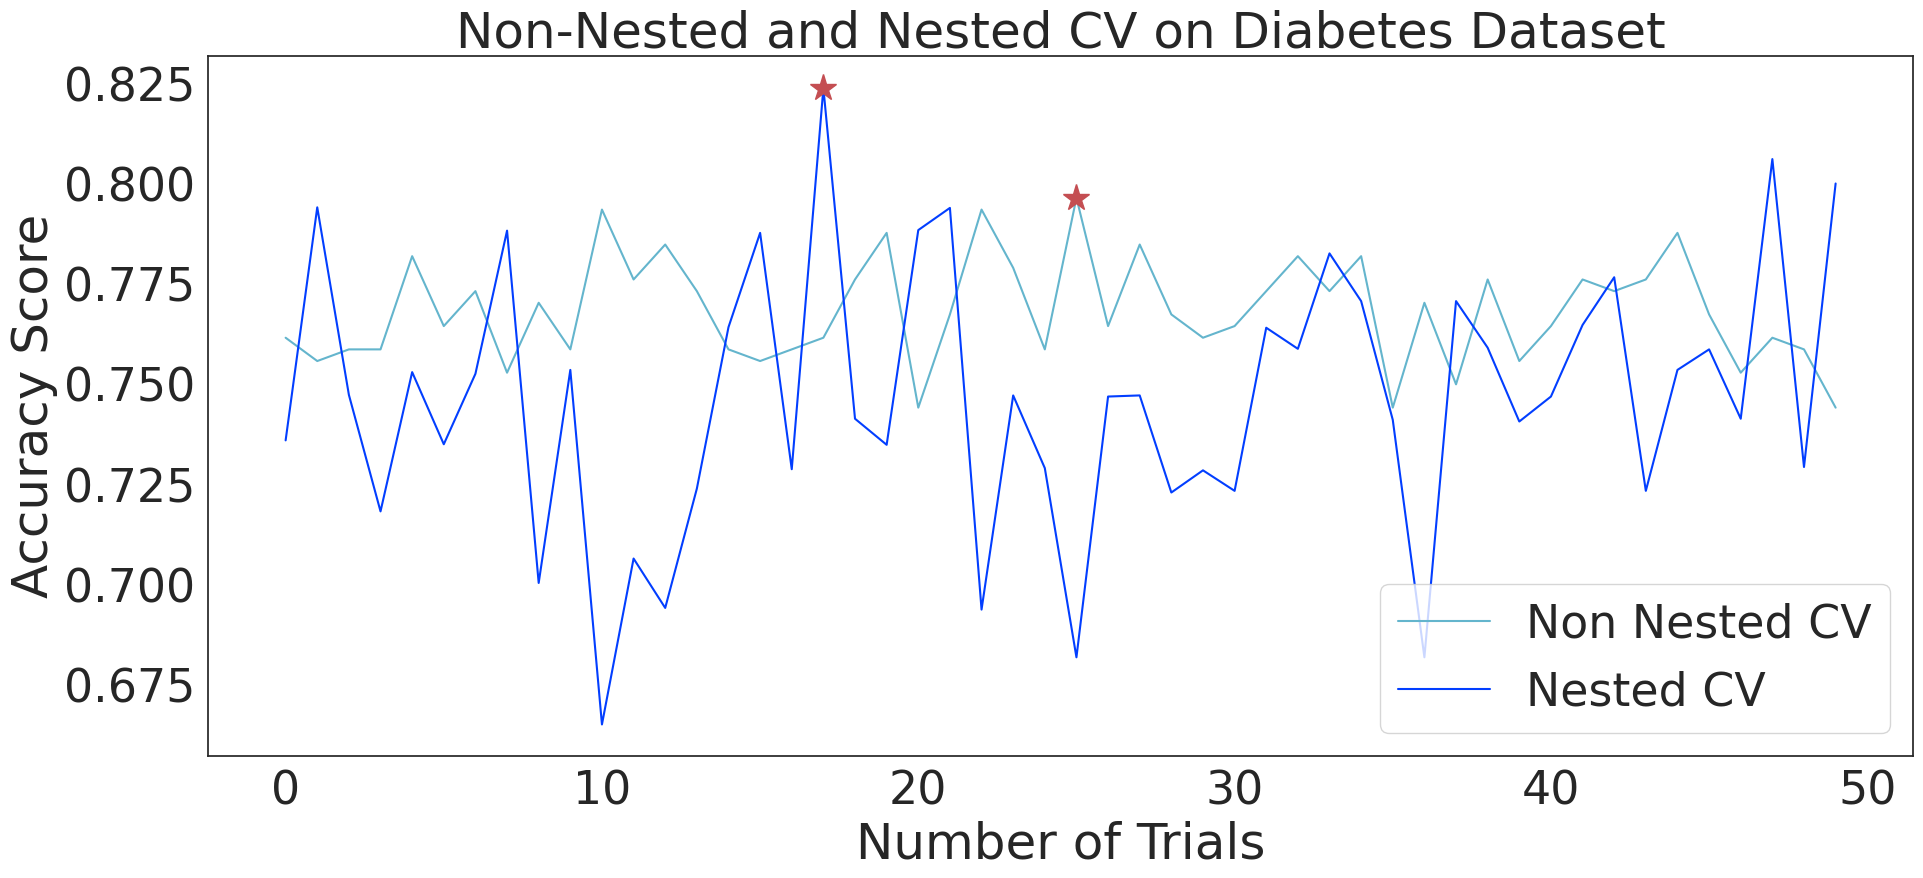

In [ ]:
# Plot non nested vs nested scores
plt.figure(figsize=(22,20))
plt.subplot(211)

(non_nested_scores2_line, ) = plt.plot(non_nested_scores2, 'c')
(nested_scores2_line, ) = plt.plot(nested_scores2)

# Max scores
plt.plot(best_non_nested_index2, max(non_nested_scores2), 'r*', markersize=20)
plt.plot(best_nested_index2, max(nested_scores2), 'r*', markersize=20)

plt.title('Non-Nested and Nested CV on Diabetes Dataset')
plt.xlabel('Number of Trials')
plt.ylabel('Accuracy Score')
plt.legend(
    [non_nested_scores2_line, nested_scores2_line],
    ['Non Nested CV', 'Nested CV']
)
plt.show()

Both highest scores (denoted by the red stars) are found before the 30th iteration, thus it may mean that 30 iterations is enough.

`num_trials = 50` is just to demonstrate this model's efficiency vs the previous one with no further splitting.

### SVM Model Validation

Classification Reports

In [ ]:
# best models for non-nested and nested
best_non_nested_model2 = clf_non_nested2.best_estimator_
best_nested_model2 = clf_nested2.best_estimator_

# thus best predictions
best_non_nested_y_pred2 = best_non_nested_model2.predict(X_test)
best_nested_y_pred2 = best_nested_model2.predict(X_test)

# Print the classification reports
print("Classification Report (Non-nested):")
print()
print(classification_report(y_test, best_non_nested_y_pred2))
print()
print("Classification Report (Nested):")
print()
print(classification_report(y_test, best_nested_y_pred2))
print()

Classification Report (Non-nested):

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       168
           1       0.64      0.57      0.60        86

    accuracy                           0.75       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.74      0.75      0.74       254


Classification Report (Nested):

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       168
           1       0.63      0.60      0.62        86

    accuracy                           0.75       254
   macro avg       0.72      0.71      0.72       254
weighted avg       0.75      0.75      0.75       254




---

Confusion matrices

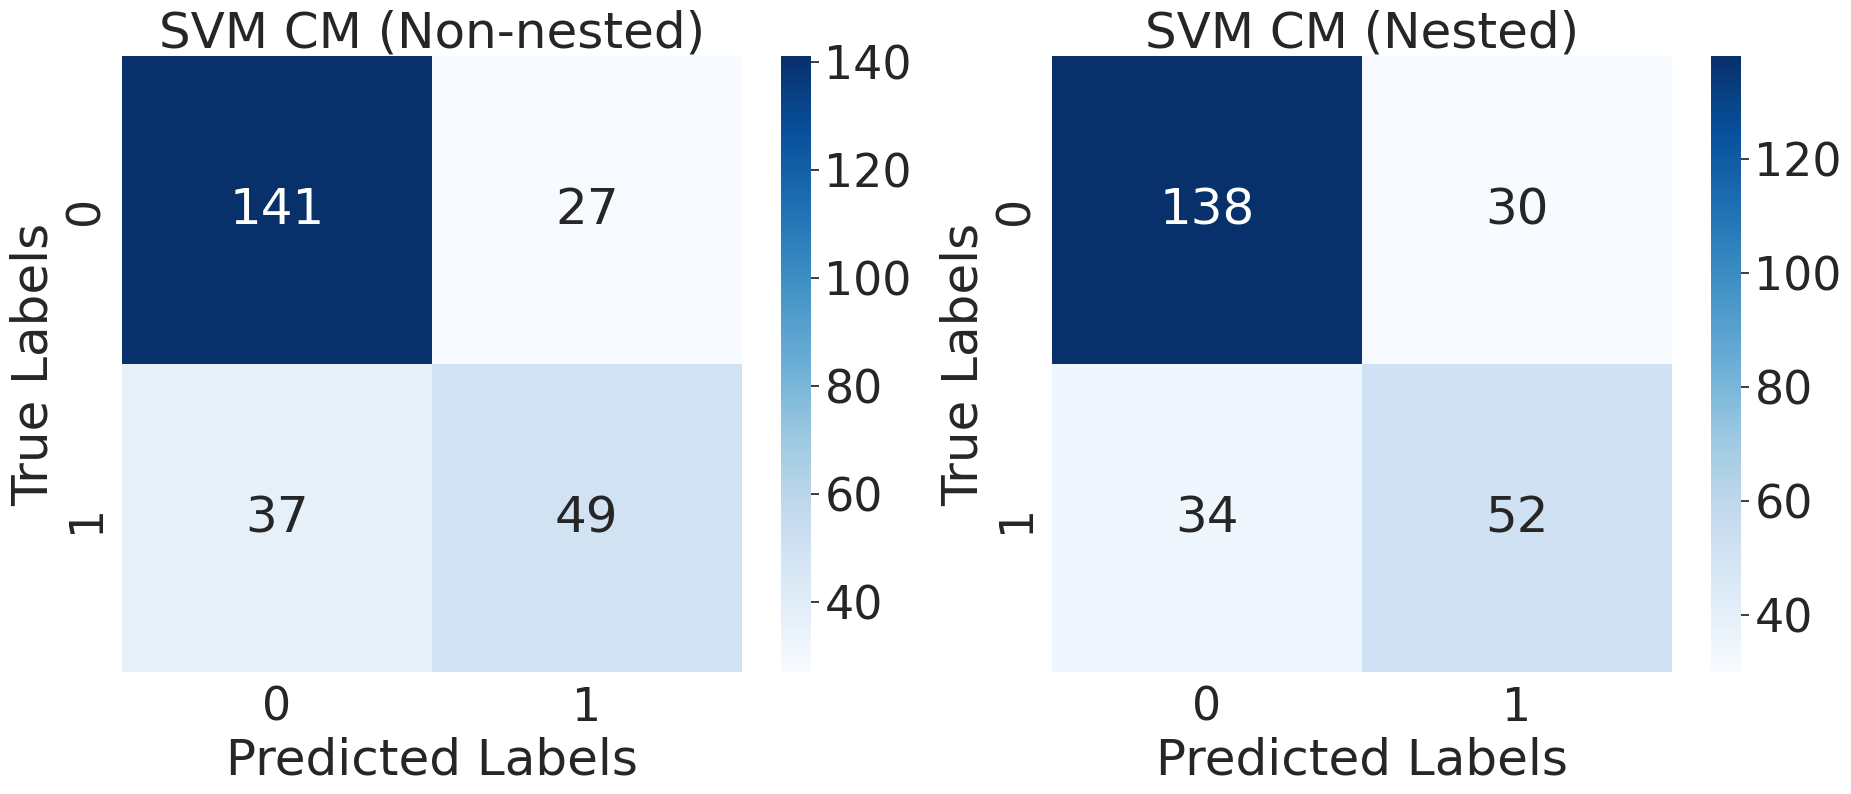

In [ ]:
non_nested_cm = confusion_matrix(y_test, non_nested_y_pred2)
nested_cm = confusion_matrix(y_test, nested_y_pred2)

plt.figure(figsize=(22,8))
plt.subplot(1, 2, 1)
sns.heatmap(non_nested_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM CM (Non-nested)')

plt.subplot(1, 2, 2)
sns.heatmap(nested_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM CM (Nested)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ROC Curve and AUC Score

In [ ]:
# non-nested
non_nested_auc = roc_auc_score(y_test, non_nested_y_pred2)
non_nested_fpr, non_nested_tpr, _ = roc_curve(y_test, non_nested_y_pred2)

# nested
nested_auc = roc_auc_score(y_test, nested_y_pred2)
nested_fpr, nested_tpr, _ = roc_curve(y_test, nested_y_pred2)

Non Nested AUC Score: 0.7045265780730898
Nested AUC Score: 0.7130398671096345



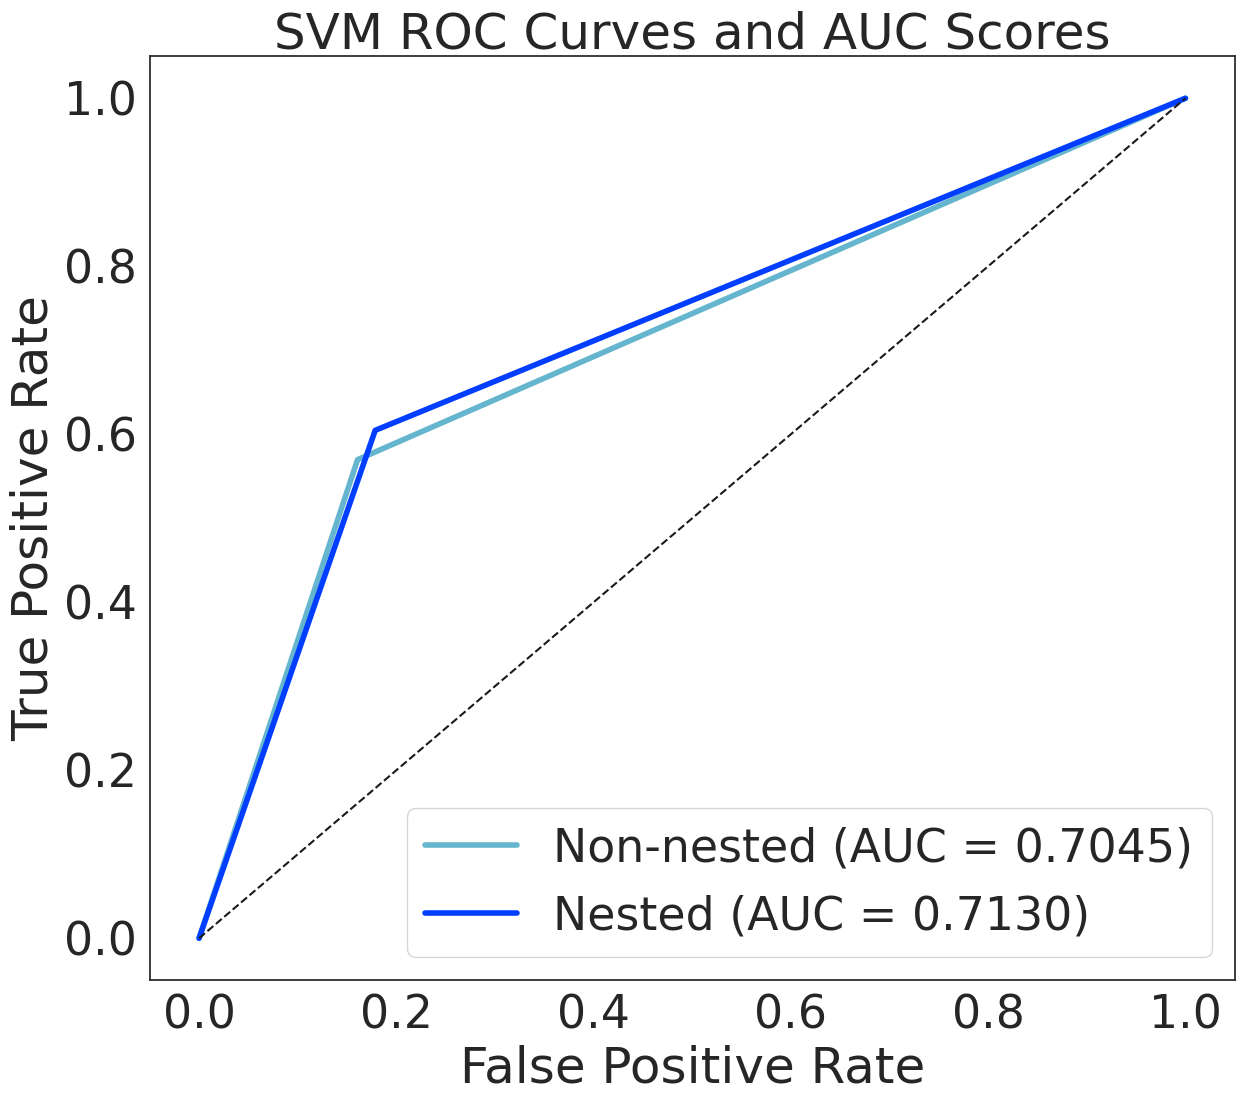

In [ ]:
# AUC score
print('Non Nested AUC Score:', non_nested_auc)
print('Nested AUC Score:', nested_auc)
print()

# ROC Curve
plt.figure(figsize=(14, 12))

plt.plot(non_nested_fpr, non_nested_tpr, 'c', linewidth=4,
         label='Non-nested (AUC = {:.4f})'.format(non_nested_auc))
plt.plot(nested_fpr, nested_tpr, linewidth=4,
         label='Nested (AUC = {:.4f})'.format(nested_auc))
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curves and AUC Scores')
plt.legend()
plt.show()

## 6) Discussion and Conclusions

Highlights of the Algorithm:

- Nonlinear standardisation
- Feature Engineering: Dropping one column
- SVM + Nested Loop CV
  - Creating separate X_train and y_train for Nested and Non Nested CV
- Validation via Accuracy Scores, Confusion Matrix, and AUC.